<a href="https://colab.research.google.com/github/RasikaOtari/RasikaO./blob/main/Copy_of_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sb
from sklearn.linear_model import LogisticRegression

In [ ]:
app_log = pd.read_csv("bank-full.csv",sep=';')

In [ ]:
app_log.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [ ]:
app_log.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
# select columns
columns = ['age', 'balance', 'duration', 'campaign', 'y']
app_log_sel = app_log[columns]
app_log_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   balance   45211 non-null  int64 
 2   duration  45211 non-null  int64 
 3   campaign  45211 non-null  int64 
 4   y         45211 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.7+ MB


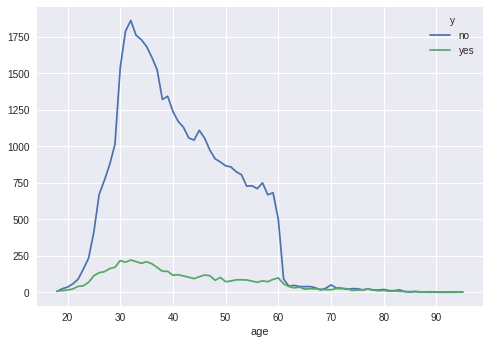

In [ ]:
pd.crosstab(app_log_sel.age,app_log_sel.y).plot(kind="line")

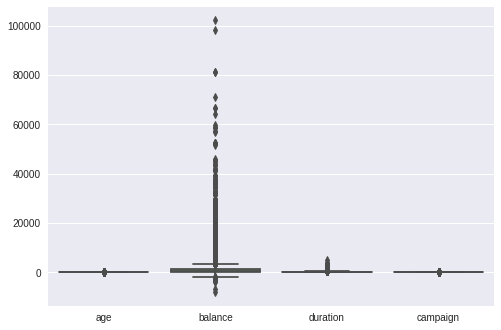

In [ ]:
sb.boxplot(data =app_log_sel,orient = "v")

In [ ]:
app_log_sel['outcome'] = app_log_sel.y.map({'no':0, 'yes':1})
app_log_sel.tail(10)

,age,balance,duration,campaign,y,outcome
45201,53,583,226,1,yes,1
45202,34,557,224,1,yes,1
45203,23,113,266,1,yes,1
45204,73,2850,300,1,yes,1
45205,25,505,386,2,yes,1
45206,51,825,977,3,yes,1
45207,71,1729,456,2,yes,1
45208,72,5715,1127,5,yes,1
45209,57,668,508,4,no,0
45210,37,2971,361,2,no,0


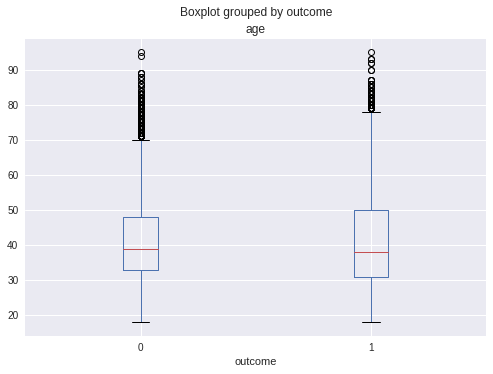

In [ ]:
app_log_sel.boxplot(column='age', by='outcome')

In [ ]:
feature_col=['age','balance','duration','campaign']
output_target=['outcome']
X = app_log_sel[feature_col]
Y = app_log_sel[output_target]

In [ ]:
classifier = LogisticRegression()

In [ ]:
classifier.fit(X,Y)

LogisticRegression()

In [ ]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression()

In [ ]:
classifier.coef_ # coefficients of features 

array([[ 7.69721666e-03,  3.72191061e-05,  3.54908901e-03,
        -1.39828310e-01]])

In [ ]:
classifier.predict_proba (X) # Probability values 

array([[0.87367389, 0.12632611],
       [0.92488732, 0.07511268],
       [0.9459632 , 0.0540368 ],
       ...,
       [0.30553763, 0.69446237],
       [0.82336233, 0.17663767],
       [0.86407825, 0.13592175]])

In [ ]:
y_pred = classifier.predict(X)

In [ ]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix = confusion_matrix(Y,y_pred)

In [ ]:
print (confusion_matrix)

[[39342   580]
 [ 4435   854]]


In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 28.5, 'Predicted Label')

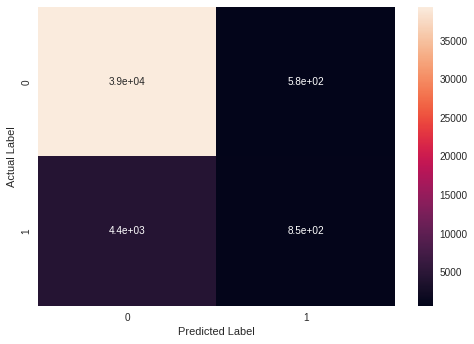

In [ ]:
sb.heatmap(confusion_matrix, annot=True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')